# Disclaimer
The dataset may have some minor modifications for educational purposes.  

The dataset contains 4242 images of flowers. All images are divided into 5 classes:  
1. Daisy  
2. Dandelion  
3. Rose  
4. Sunflower  
5. Tulip  

You are asked to train a CNN model with using `fastai cnn_learner`, visualize results, predict random training images.  

## Complete Homework with Following Steps:
1. Name your final homework script as “Flower-Classification”.  
2. Create a repository named “convnet-fastai” in your Github account and push your homework script to this repository.  
3. Fork other users’ repositories, make pull requests (at least one, making three pull requests is desirable).  

**Note:** Your pull should either fix problems or add new features.


# Qeyd
Dataset təhsil məqsədləri üçün kiçik dəyişikliklərə malik ola bilər.  

Datasetdə 4242 ədəd gül şəkli var. Bütün şəkillər 5 sinfə bölünür:  
1. Daisy  
2. Dandelion  
3. Rose  
4. Sunflower  
5. Tulip  

Sizdən `fastai cnn_learner` istifadə edərək bir CNN modeli qurmağınız, nəticələri vizuallaşdırmağınız və təsadüfi seçilmiş təlim şəkilləri üzərində proqnozlaşdırma aparmağınız tələb olunur.  

## Tapşırığı Tamamlamaq üçün Addımlar:
1. Son tapşırıq skriptinizi “Flower-Classification” adlandırın.  
2. GitHub hesabınızda “convnet-fastai” adlı bir repository yaradın və tapşırıq skriptinizi həmin repository-ə yükləyin.  
3. Digər istifadəçilərin repository-lərini fork edin və pull request-lər yaradın (ən azı bir, ideal olaraq üç pull request yaradın).  

**Qeyd:** Pull request-ləriniz problemləri həll etməli və ya yeni xüsusiyyətlər əlavə etməlidir.

In [2]:
import numpy as np
import pandas as pd
import os

In [3]:
import torch
torch.__version__

'2.5.1+cu121'

In [4]:
import fastai
fastai.__version__

'2.7.18'

In [1]:
# !nvidia-smi komandasının icrası, sistemdəki NVIDIA GPU-nun vəziyyətini göstərir.
# Bu əmr aşağıdakı məlumatları təqdim edir:
# 1. GPU-nun modeli
# 2. Yaddaşın istifadə miqdarı və boş yaddaş
# 3. GPU-nun işləmə temperaturu
# 4. GPU-nun istifadə faizi
# 5. GPU istifadə edən proseslər haqqında məlumat
!nvidia-smi

Sat Nov 23 11:17:26 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:

# fastai kitabxanasını tam olaraq import edir
# Bu, fastai-nin bütün modul və funksiyalarını daxil edir
from fastai import *

# fastai.vision modulunu import edir
# Bu modul şəkil tanıma və işləmə ilə bağlı funksiyalar və siniflər təqdim edir
from fastai.vision import *

# fastai.vision.all modulu, fastai.vision ilə əlaqəli bütün funksiyaları və sinifləri daxil edir
# Bu, ən çox istifadə olunan funksiyaları və metodları təmin edir
from fastai.vision.all import *

### Data yuklenir

Real Data 'C:\Users\dell\Desktop\Python\week12\Folder\flowers' bu qovludadir. 'flowers' ovlugunda 'daisy', 'dandelion', 'rose', 'sunflower', 'tulip' qovlugu var. Her qovluqdada sekiller var

Colab bu datani komputerden ceke bilmir. Datani google drive yuklemek lazimidr.

Bu kod parçası, Google Colab-də Google Drive-ı mount etməyə (bağlamağa) imkan verir. Google Drive-ı mount etdikdən sonra, Drive-da olan faylları oxumaq və ya yazmaq mümkündür.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Google Drive-de faylin yolunu tapmaq

In [4]:

import os

# Drive-da faylları siyahılayın
for root, dirs, files in os.walk('/content/drive/My Drive'):
    # for file in files:
    #     # print(os.path.join(root, file))
    print(root)

/content/drive/My Drive
/content/drive/My Drive/Colab Notebooks
/content/drive/My Drive/Data_sets
/content/drive/My Drive/Folder
/content/drive/My Drive/Folder/flowers
/content/drive/My Drive/Folder/flowers/sunflower
/content/drive/My Drive/Folder/flowers/daisy
/content/drive/My Drive/Folder/flowers/rose
/content/drive/My Drive/Folder/flowers/tulip
/content/drive/My Drive/Folder/flowers/dandelion


### Plot Pictures

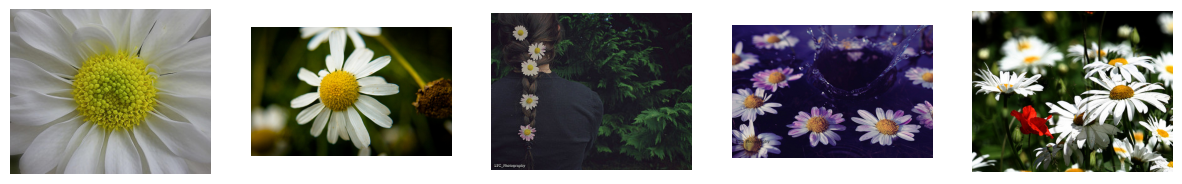

In [5]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Datasetin əsas yolunu göstəririk
path = r"/content/drive/My Drive/Folder"
data_path = os.path.join(path, "flowers")

# Şəkilləri yükləyəcəyimiz sinifi seçirik (məsələn, "daisy")
category = 'daisy'  # Burada kateqoriyanı dəyişə bilərsiniz
image_folder = os.path.join(data_path, category)

# İlk 5 şəkili yükləyirik
image_files = os.listdir(image_folder)[:5]  # İlk 5 şəkil

# Şəkilləri göstəririk
plt.figure(figsize=(15, 10))  # Şəkillərin ölçüsünü təyin edirik
for i, image_file in enumerate(image_files):
    image_path = os.path.join(image_folder, image_file)
    image = Image.open(image_path)

    # Şəkli subplot-da göstəririk
    plt.subplot(1, 5, i + 1)  # 1 sıra və 5 sütunlu subplot
    plt.imshow(image)
    plt.axis('off')

plt.show()

### Qovluğu ZIP formatına çevirmək

In [14]:
import shutil

# Qovluğun yolunu və çıxış zip faylının adını təyin edin
folder_to_zip = '/content/drive/My Drive/Folder/flowers'
output_zip_path = '/content/drive/My Drive/Folder/flowers.zip'

# Qovluğu zip faylına çevir
shutil.make_archive(output_zip_path.replace('.zip', ''), 'zip', folder_to_zip)

print(f"Qovluq zip faylına çevrildi: {output_zip_path}")

Qovluq zip faylına çevrildi: /content/drive/My Drive/Folder/flowers.zip


### Zip Faylını Yenidən İstifadə Etmək

In [15]:
import zipfile

# Zip faylının yolunu və açılacağı qovluğu təyin edin
zip_file_path = '/content/drive/My Drive/Folder/flowers.zip'
extract_to = '/content/flowers'

# Zip faylını aç
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Fayllar açıldı: {extract_to}")

Fayllar açıldı: /content/flowers


### Model Üçün Dataset Yolunu Yenidən Təyin Etmək

In [16]:
# Datasetin əsas yolunu göstəririk
data_path = '/content/flowers'

### Data Preparation

In [18]:
# Bu kod, 'ImageDataLoaders' istifadə edərək şəkilləri yükləmək və işlətmək üçün bir məlumat yükləyici yaradır.
# 'data_path' dəyişənində göstərilən qovluqdan şəkillər yüklənir.
# 'item_tfms' dəyişəni şəkillərin əvvəlcədən işlənməsi üçün təsadüfi ölçüdə kəsilməsini (RandomResizedCrop) müəyyən edir.
# 'batch_tfms' isə şəkillərin normalizasiyasını həyata keçirir ki, bu da modelin daha yaxşı öyrənməsinə kömək edir.
# 'valid_pct=0.2' isə verilənlərin 20%-ni doğrulama (validation) üçün ayırır.

tfms_for_item = RandomResizedCrop(128, min_scale=0.55)  # Şəkilləri təsadüfi ölçüdə kəsir (crop).
tfms_for_batch = [Normalize.from_stats(*imagenet_stats)]  # Şəkilləri ImageNet statistikaları ilə normalizə edir.

data = ImageDataLoaders.from_folder(
                                data_path,               # Datasetin yolu.
                                item_tfms=tfms_for_item,  # Şəkillərin əvvəlcədən işlənməsi.
                                batch_tfms=tfms_for_batch, # Şəkillərin normalizasiyası.
                                valid_pct=0.2            # Verilənlərin 20%-ini doğrulama üçün ayır.
                                )

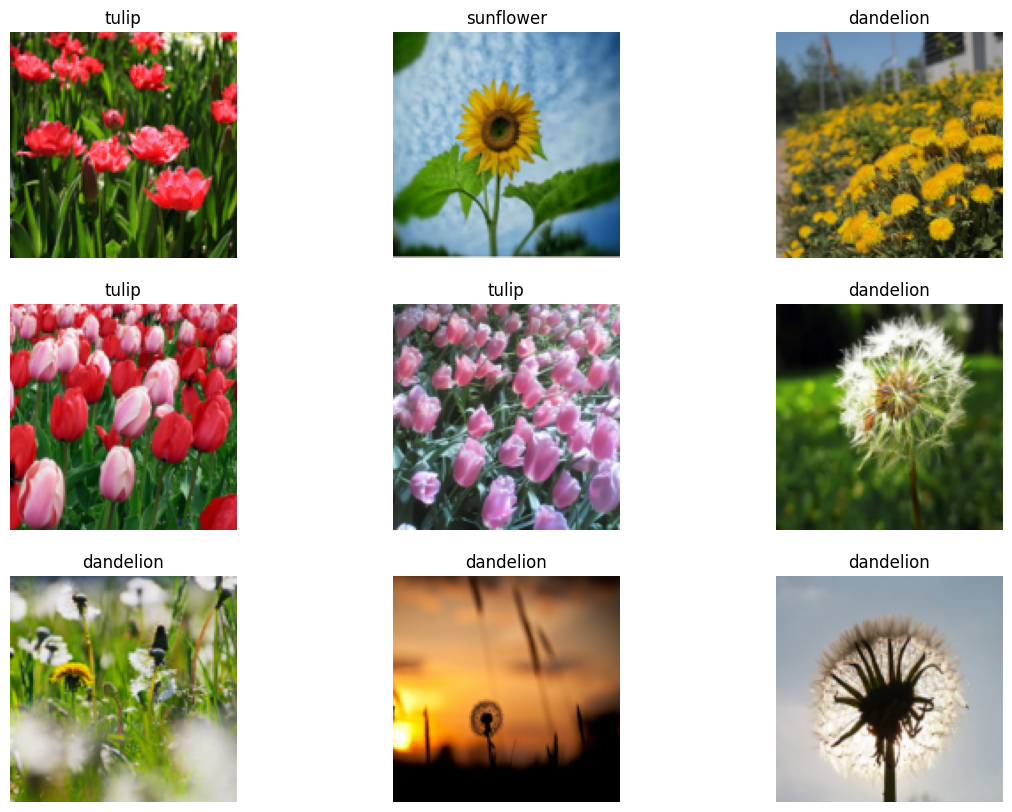

In [19]:
# Bu kod, yüklənmiş datasetdən təsadüfi şəkillərin bir qrupunu göstərir.
# "data.show_batch(figsize=(14,10))" funksiyası ilə datasetdən 16 təsadüfi şəkil seçilir və onları 4x4 şəkildə göstərir.
# "figsize" parametri ilə göstərilən şəkillərin ölçüsü (14, 10) kimi təyin edilir.
# Bu funksiya, modelin öyrədilməsi və ya test edilməsi üçün şəkillərin vizuallaşdırılmasında faydalıdır.
data.show_batch(figsize=(14,10))

In [20]:
# Datasetdəki siniflərin sayını çap edir
print('Number of classes:', data.c)  # 'data.c' siniflərin ümumi sayını verir.

Number of classes: 5


In [21]:
# Datasetdən class (sinif) adlarını əldə etmək
class_names = data.vocab

print("Class Names:", class_names)

Class Names: ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


### Creat Model

In [38]:
# CNN modelini qurur, 'data' ImageDataLoaders obyektini, 'resnet34' modelini və müəyyən edilmiş metrikləri istifadə edir.
model = cnn_learner(
    # Datasetin təlim və doğrulama üçün istifadə edilən obyekt.
    data,
    # Modelin əsası olaraq efficientnet_b0 arxitekturasını istifadə edir.
    efficientnet_b0,
    # Modelin performansını qiymətləndirmək üçün səhv nisbəti (error_rate) və düzgünlük (accuracy) metrikləri.
    metrics=[error_rate, accuracy],
    # Modelin təlimi zamanı saxlanacağı direktoriyanın yolu.
    model_dir= "/tmp/model_homework/"
)

In [39]:
model.summary()

Sequential (Input shape: 64 x 3 x 128 x 128)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 32 x 64 x 64   
Conv2d                                    864        False     
BatchNorm2d                               64         True      
SiLU                                                           
Conv2d                                    288        False     
BatchNorm2d                               64         True      
SiLU                                                           
____________________________________________________________________________
                     64 x 32 x 1 x 1     
AdaptiveAvgPool2d                                              
____________________________________________________________________________
                     64 x 8 x 1 x 1      
Conv2d                                    264        False     
____________________________________________________________________________
                     6

### Train Stage

SuggestedLRs(valley=0.0012022644514217973)

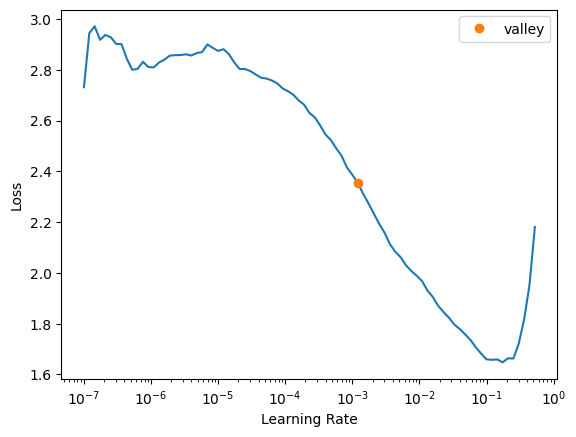

In [40]:
# Model üçün optimal öyrənmə sürətini (learning rate) təyin edir.
model.lr_find()

In [41]:
# Modeli bir tam dövr (epoch) ərzində müəyyən edilmiş maksimum öyrənmə sürəti ilə öyrədir.
model.fit_one_cycle(
    n_epoch=5,                  # Təlim üçün dövrlərin (epochs) sayı.
    lr_max=0.0012022644514217973  # Maksimum öyrənmə sürəti (learning rate).
)

### Model save

In [42]:
model.save('my_model_homework.pkl')

Path('/tmp/model_homework/my_model_homework.pkl.pth')

### Show Results

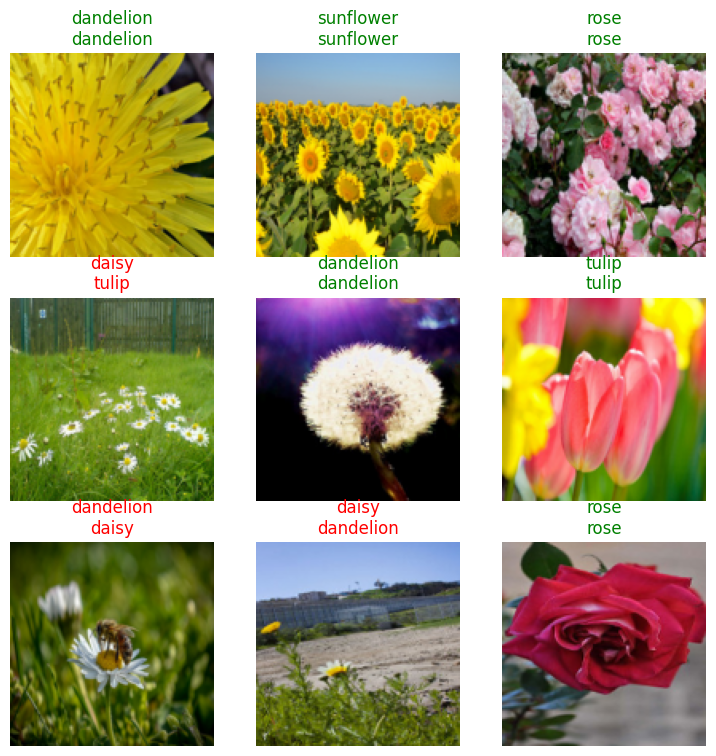

In [43]:
# Modelin təlim (train) verilənlərindəki nəticələrini vizual şəkildə göstərir.
model.show_results()

### Interpretation Losses

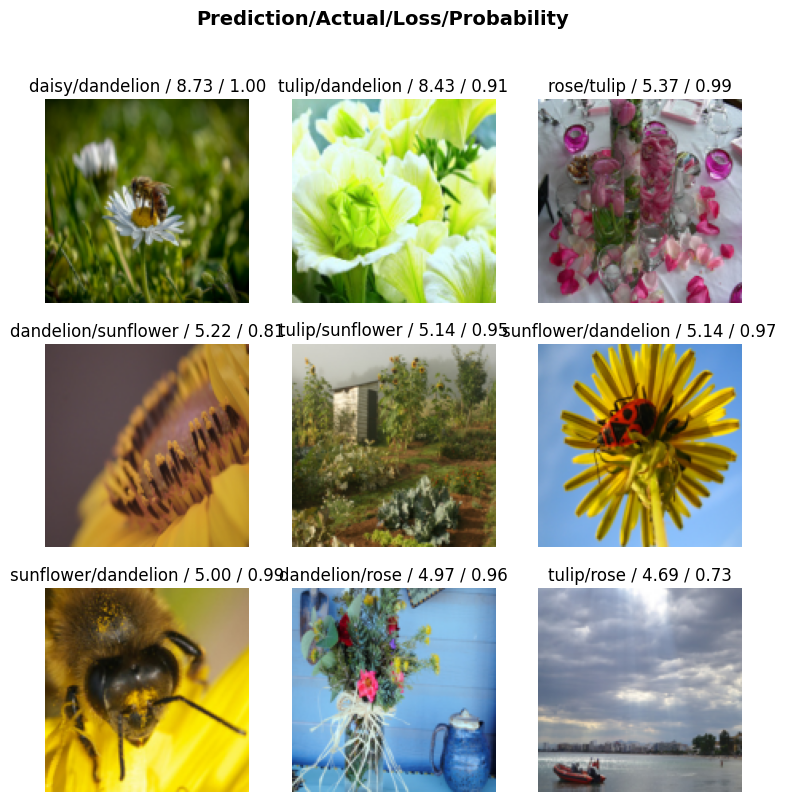

In [44]:
# Modelin performansını dərinlə analiz edir və ən çox səhv etdiyi nümunələri göstərir.
interpretation = Interpretation.from_learner(model) # Öyrədilmiş modeli interpretasiya üçün istifadə edir.


# Ən çox itkiyə (loss) səbəb olan 15 nümunəni vizual şəkildə göstərir.
interpretation.plot_top_losses(
    k=9  # Göstəriləcək nümunələrin sayı.
)

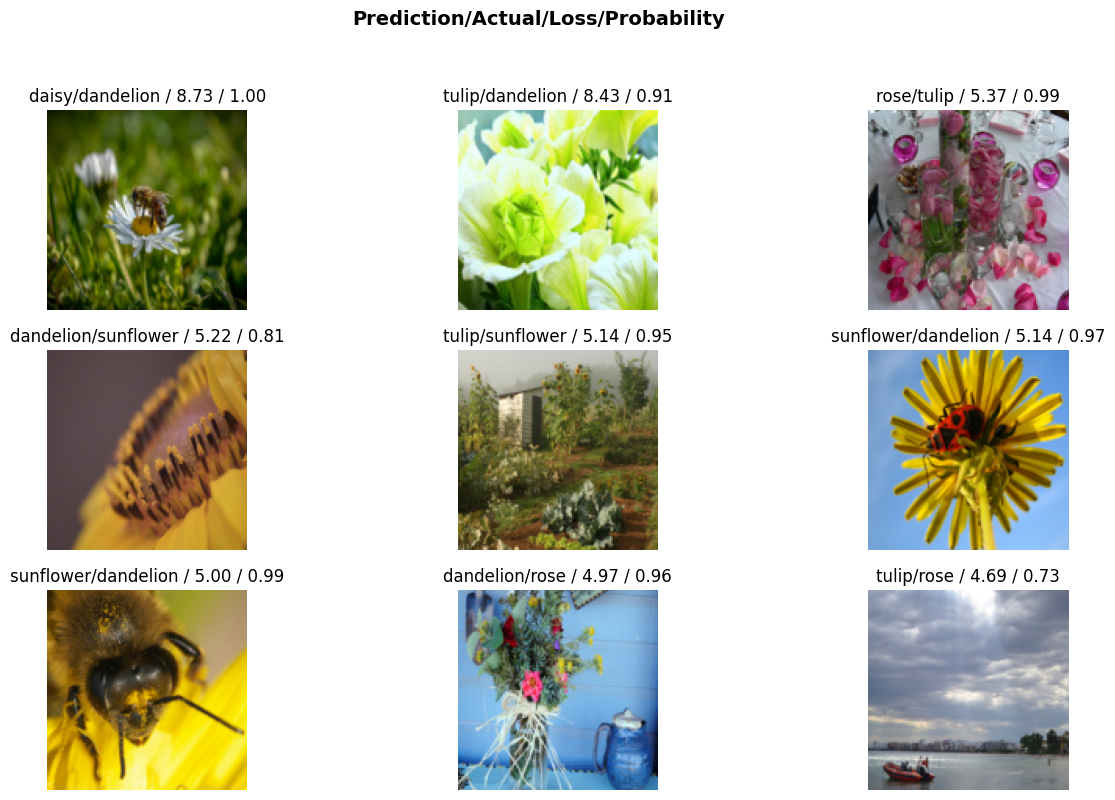

In [49]:
import matplotlib.pyplot as plt

# Top losses plotunu göstərərkən:
interpretation.plot_top_losses(k=9, figsize=(15, 10))

# Adlar arasındakı məsafəni artırmaq
plt.subplots_adjust(bottom=0.2)
plt.xticks(rotation=90)
plt.show()

### Interpretation Confusion Matrix Classification

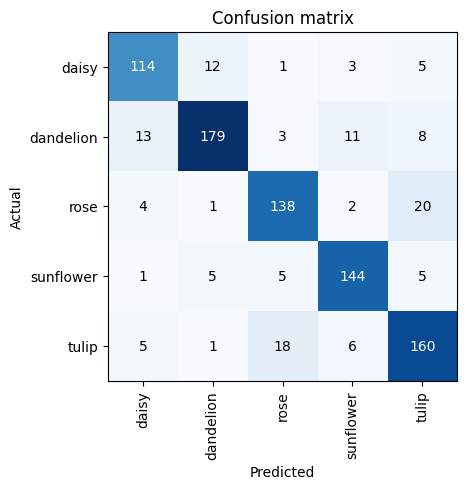

In [50]:

# Modelin sinifləndirmə nəticələrinin təhlilini aparır.
# Öyrədilmiş modelin sinifləndirmə interpretasiyasını alır.
interp = ClassificationInterpretation.from_learner(model)

# Konfuzion matrisi (confusion matrix) vizual şəkildə göstərir.
interp.plot_confusion_matrix(
    # figsize=(15, 10),  # Qrafikin ölçüləri.
    # dpi=60            # Qrafikin keyfiyyəti (dots per inch).
)

### Test Stage and Metrics

In [51]:
from sklearn.metrics import classification_report, accuracy_score, f1_score, recall_score, precision_score,\
                                                                                                   confusion_matrix

# 1. Validation datası üzərində proqnozları almaq
# Bu, `get_preds` funksiyası ilə olur və həm proqnozları (preds), həm də əsl etiketləri (targets) alır
preds, targets = model.get_preds(dl=data.valid)

# 2. Proqnozları ən ehtimal olunan sinfə çevirmək
# Bu ehtimalların ən yüksək dəyərinə uyğun olan sinfi alırıq
pred_labels = preds.argmax(dim=1)

# 3. Metrikləri hesablamaq
accuracy = accuracy_score(targets, pred_labels)
f1 = f1_score(targets, pred_labels, average='weighted')
recall = recall_score(targets, pred_labels, average='weighted')
precision = precision_score(targets, pred_labels, average='weighted')
conf_matrix = confusion_matrix(targets, pred_labels)
class_report = classification_report(targets, pred_labels)

# 4. Nəticələri çap etmək
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.8507
F1 Score: 0.8509
Recall: 0.8507
Precision: 0.8520
Confusion Matrix:
[[114  12   1   3   5]
 [ 13 179   3  11   8]
 [  4   1 138   2  20]
 [  1   5   5 144   5]
 [  5   1  18   6 160]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       135
           1       0.90      0.84      0.87       214
           2       0.84      0.84      0.84       165
           3       0.87      0.90      0.88       160
           4       0.81      0.84      0.82       190

    accuracy                           0.85       864
   macro avg       0.85      0.85      0.85       864
weighted avg       0.85      0.85      0.85       864



### Sekili komputerden Colab-a yuklemek methodu

In [52]:
from google.colab import files
uploaded = files.upload()

Saving rose.jpg to rose.jpg


### Real Forecast

In [53]:
from fastai.vision.all import PILImage

# Şəkili `PILImage` kimi yükləyin
img_path = "rose.jpg"  # Şəkil yolunu dəqiq göstərmək lazımdır
img = PILImage.create(img_path)  # `PILImage.create` ilə şəkili yükləyərək Fastai-nin gözlədiyi formata çeviririk

# Proqnoz almaq
pred_class, pred_idx, outputs = model.predict(img)

# Nəticəni çap etmək
print(f"Proqnozlaşdırılan sinif: {pred_class}")
print(f"Sinif indeks nömrəsi: {pred_idx}")
print(f"Ehtimallar: {outputs}")

Proqnozlaşdırılan sinif: rose
Sinif indeks nömrəsi: 2
Ehtimallar: tensor([0.0742, 0.1158, 0.5340, 0.2617, 0.0142])


### Check Forecast

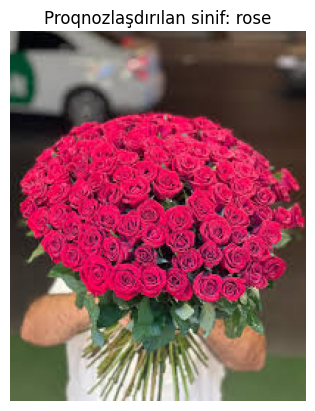

In [55]:
import matplotlib.pyplot as plt
from fastai.vision.all import PILImage

# Şəkili yükləyin və `PILImage` kimi oxuyun
img_path = "rose.jpg"
img = PILImage.create(img_path)

# Proqnozlaşdırma
pred_class, pred_idx, outputs = model.predict(img)

# Şəkili və proqnozu vizuallaşdırın
plt.imshow(img)
plt.title(f"Proqnozlaşdırılan sinif: {pred_class}")
plt.axis("off")  # Oks koordinatlarını gizlədir
plt.show()